<a href="https://colab.research.google.com/github/HedersonSantos/PredictFligthTicket/blob/main/predicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/train_tratado.csv
!wget https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/test_tratado.csv

--2023-03-11 17:12:03--  https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/train_tratado.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729899 (713K) [text/plain]
Saving to: ‘train_tratado.csv’

train_tratado.csv   100%[===================>] 712.79K  --.-KB/s    in 0.04s   

2023-03-11 17:12:03 (15.5 MB/s) - ‘train_tratado.csv’ saved [729899/729899]

--2023-03-11 17:12:03--  https://raw.githubusercontent.com/HedersonSantos/PredictFligthTicket/main/data/test_tratado.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

In [12]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import io, math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)
#https://machinehack.com/hackathons/predict_the_flight_ticket_price_hackathon/data     

In [5]:
train=pd.read_csv("train_tratado.csv", header=0)
target=['Price']

In [8]:
med = train.groupby(['source_latitude', 'source_longitude', 'destination_latitude',
       'destination_longitude', 'rush_time', 'Duration_in_hours',
       'Qt_Total_Stops', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', '1 Long layover',
       'Change airports', 'Business class', 'Red-eye flight', '2 Long layover'], as_index=True)[target].median()
median_map = med.stack().to_dict()      


In [13]:
train.describe()

,source_latitude,source_longitude,destination_latitude,destination_longitude,rush_time,Duration_in_hours,Qt_Total_Stops,In-flight meal not included,No check-in baggage included,1 Short layover,1 Long layover,Change airports,Business class,Red-eye flight,2 Long layover,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,22.617257,80.084974,15.661086,77.451269,0.517083,10.718221,0.824113,0.185528,0.029954,0.000094,0.001779,0.000655,0.000374,0.000094,0.000094,9087.064121
std,6.110668,5.174261,7.112499,2.197387,0.499731,8.464367,0.675244,0.388744,0.170469,0.009675,0.042137,0.025591,0.019347,0.009675,0.009675,4611.359167
min,12.994100,72.862800,10.151800,76.393000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,19.090400,77.100000,10.151800,76.393000,0.000000,2.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5277.000000
50%,22.572600,77.706800,13.198900,77.100000,1.000000,8.666667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8372.000000
75%,28.556200,88.363900,17.240300,77.706800,1.000000,15.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12373.000000
max,28.556200,88.363900,28.556200,88.363900,1.000000,47.666667,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,79512.000000


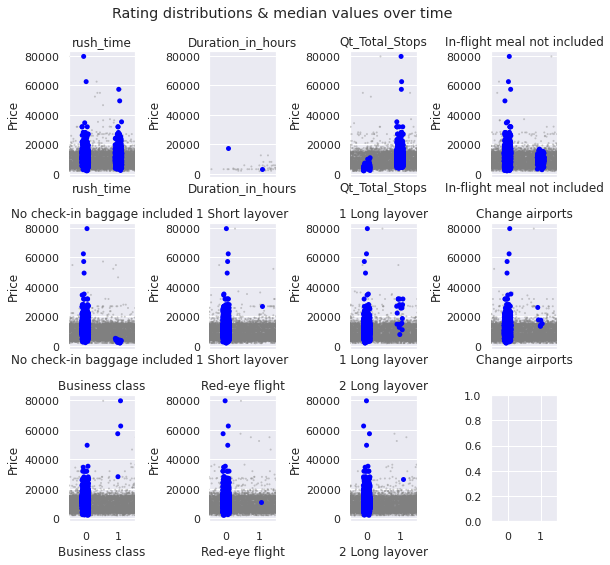

In [18]:
fig, ax = plt.subplots(nrows=3,ncols=4, sharex=True, figsize=(8,8))

vars = [ 'rush_time', 'Duration_in_hours','Qt_Total_Stops','In-flight meal not included','No check-in baggage included', 
        '1 Short layover', '1 Long layover', 'Change airports', 'Business class', 'Red-eye flight', '2 Long layover']
for e, ax in enumerate(ax.flat):
    if e==11: break
    sns.stripplot(data = train, x=vars[e], y='Price', jitter=2, size=2, alpha = .4,color='gray', ax = ax)
    sns.stripplot(data = med.reset_index(), x=vars[e], y='Price', color='blue', label='median', ax = ax)
    ax.set_title(vars[e])
plt.suptitle('Rating distributions & median values over time')
plt.tight_layout()
plt.show()


In [14]:
train.columns

Index(['source_latitude', 'source_longitude', 'destination_latitude',
       'destination_longitude', 'rush_time', 'Duration_in_hours',
       'Qt_Total_Stops', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', '1 Long layover',
       'Change airports', 'Business class', 'Red-eye flight', '2 Long layover',
       'Price'],
      dtype='object')